In [41]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#plt.style.use ('ggplot')

In [42]:
df1 = pd.read_csv('data/socio_health_covid1.csv')

In [43]:
df1.shape

(3142, 33)

In [44]:
df1.head(5)

,fips,Pop_Dens,perc_below_pov,perc_unemp,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,perc_no_vehicle,perc_group_quarters,...,Population,perc_fem,perc_rural,pcp_rate_100k,65_older,17_younger,uninsured,lim_eng,cases,deaths
0,1001,92.859967,15.4,4.2,19.3,25.0,3.8,1.4,5.6,1.0,...,55416,51.3,42.0,74.0,14.65,24.30,8.05,0.80,1427.0,82.0
1,1003,130.901947,10.6,4.4,14.0,17.0,18.3,1.3,3.4,1.4,...,208563,51.5,42.3,117.0,19.60,21.80,11.10,0.65,5163.0,110.0
2,1005,29.132150,28.9,9.5,22.2,53.9,1.3,3.4,9.2,11.2,...,25965,46.9,67.8,69.0,18.00,21.10,12.10,1.55,1057.0,13.0
3,1007,36.190214,14.0,7.5,16.7,25.4,2.4,0.8,6.0,9.3,...,22643,46.4,68.4,128.0,15.85,20.75,9.95,0.35,1142.0,4.0
4,1009,89.395591,14.4,4.1,14.2,12.9,0.9,1.6,4.2,0.9,...,57704,50.6,90.0,33.0,17.90,23.30,12.50,1.80,1081.0,0.0


In [45]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


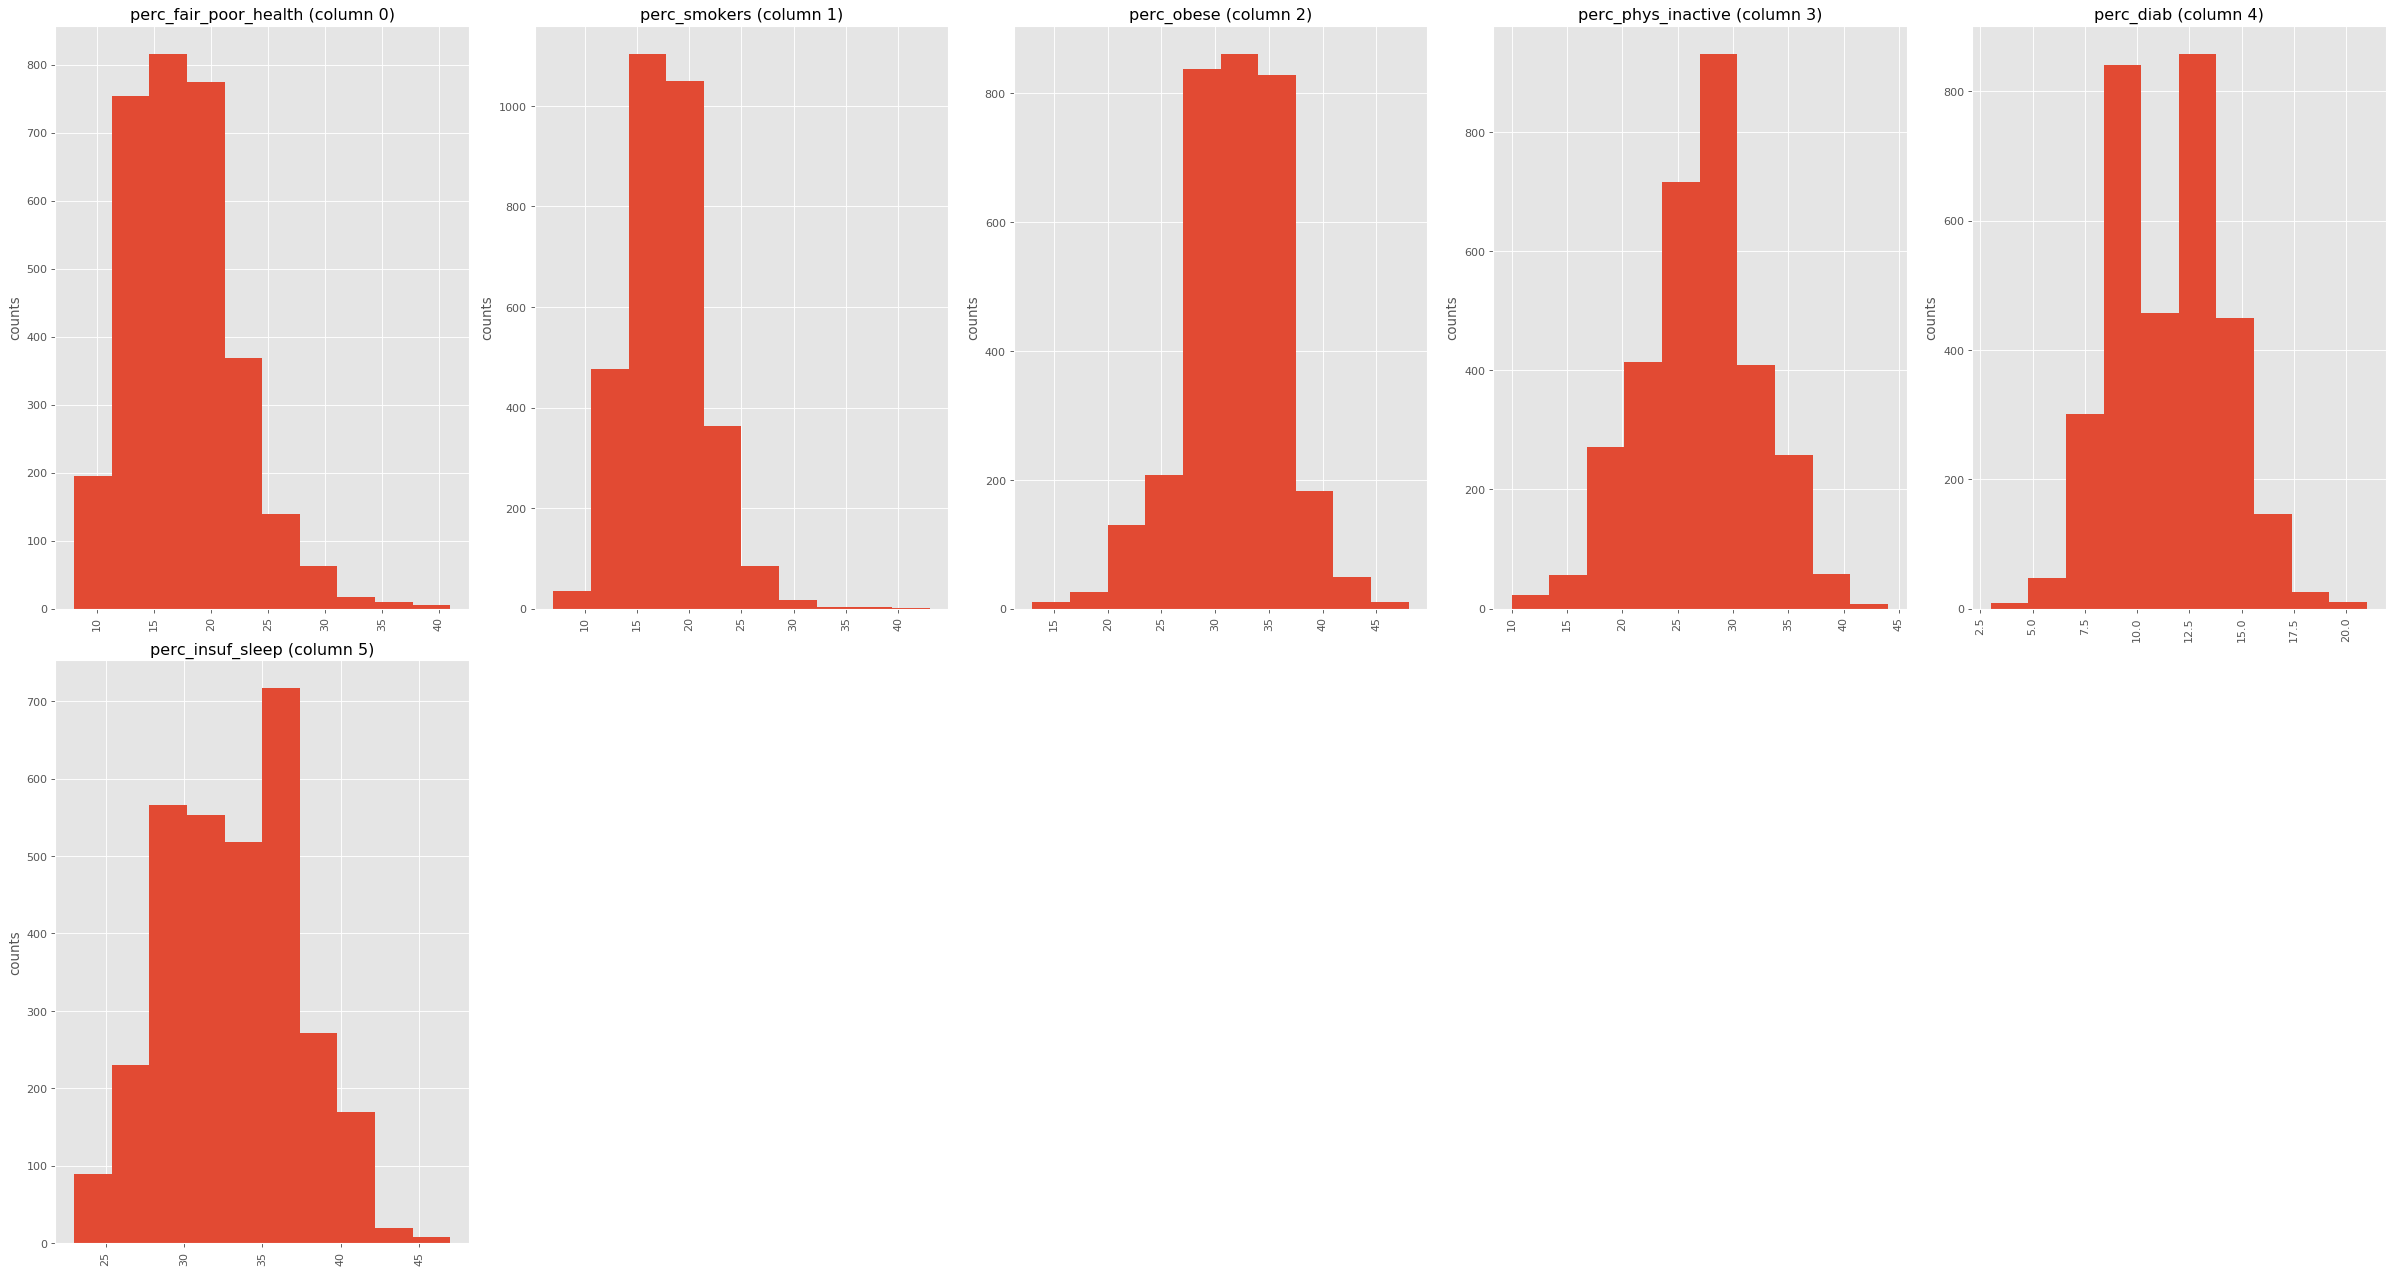

In [46]:
plotPerColumnDistribution(df1, 10, 5)

In [33]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

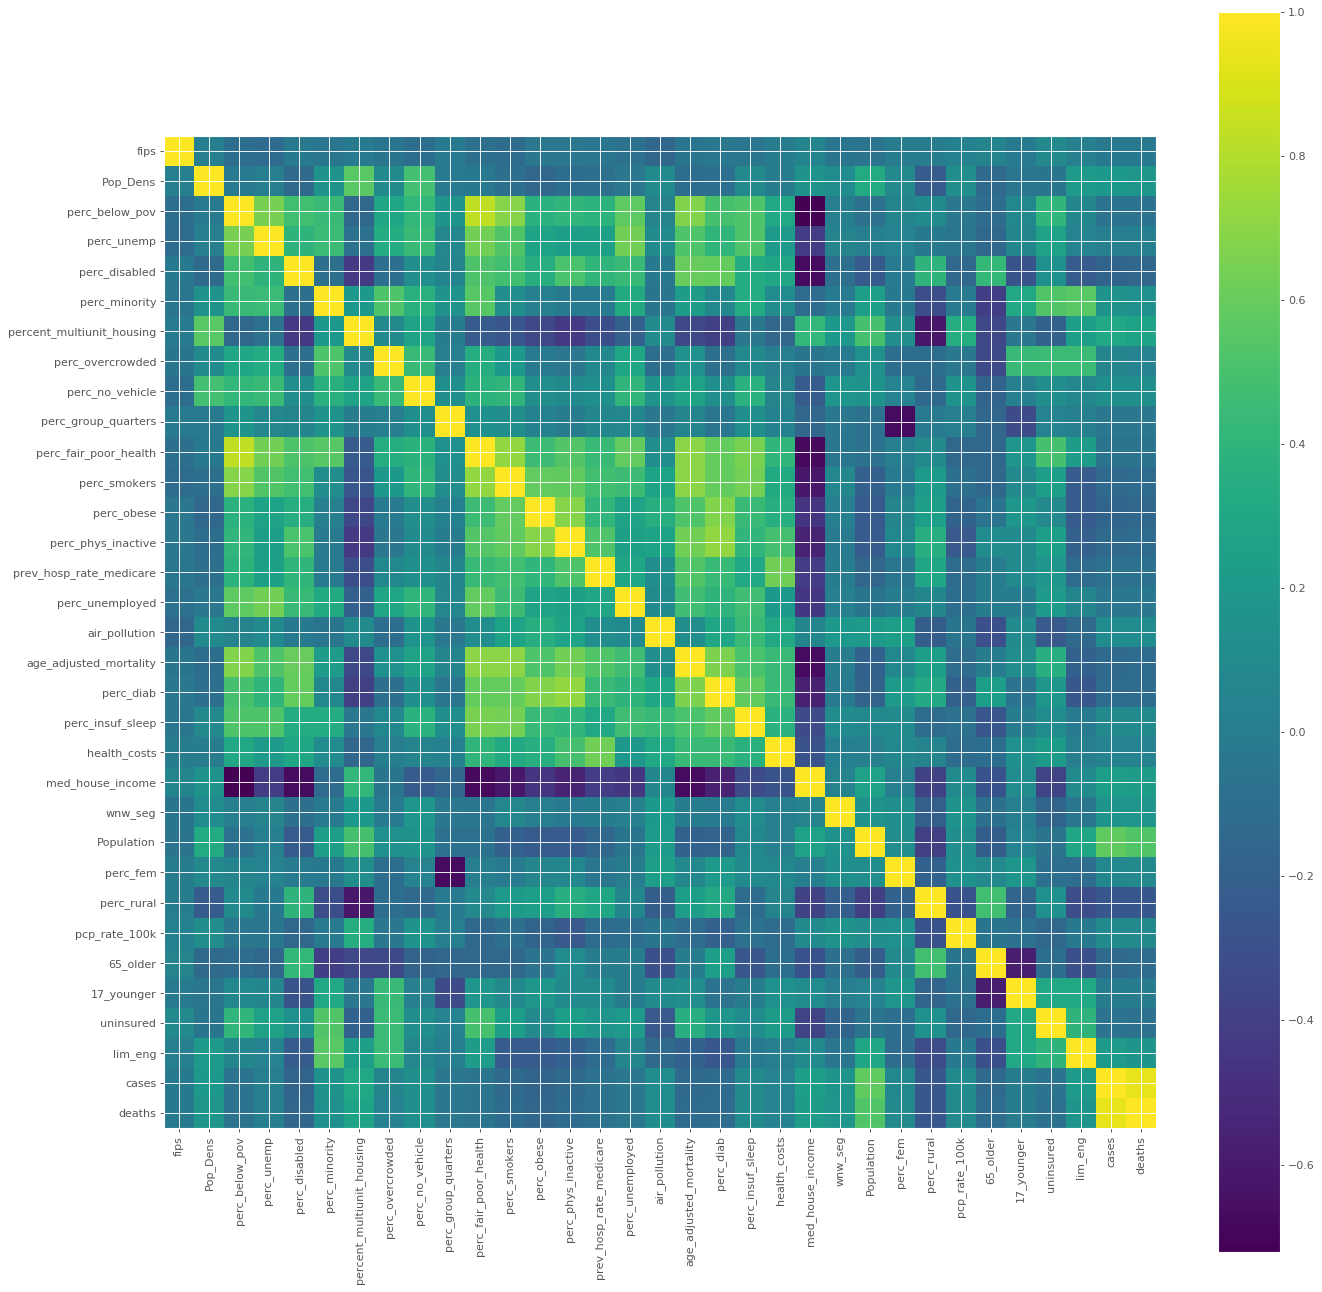

In [34]:
plotCorrelationMatrix(df1, 20)

In [13]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

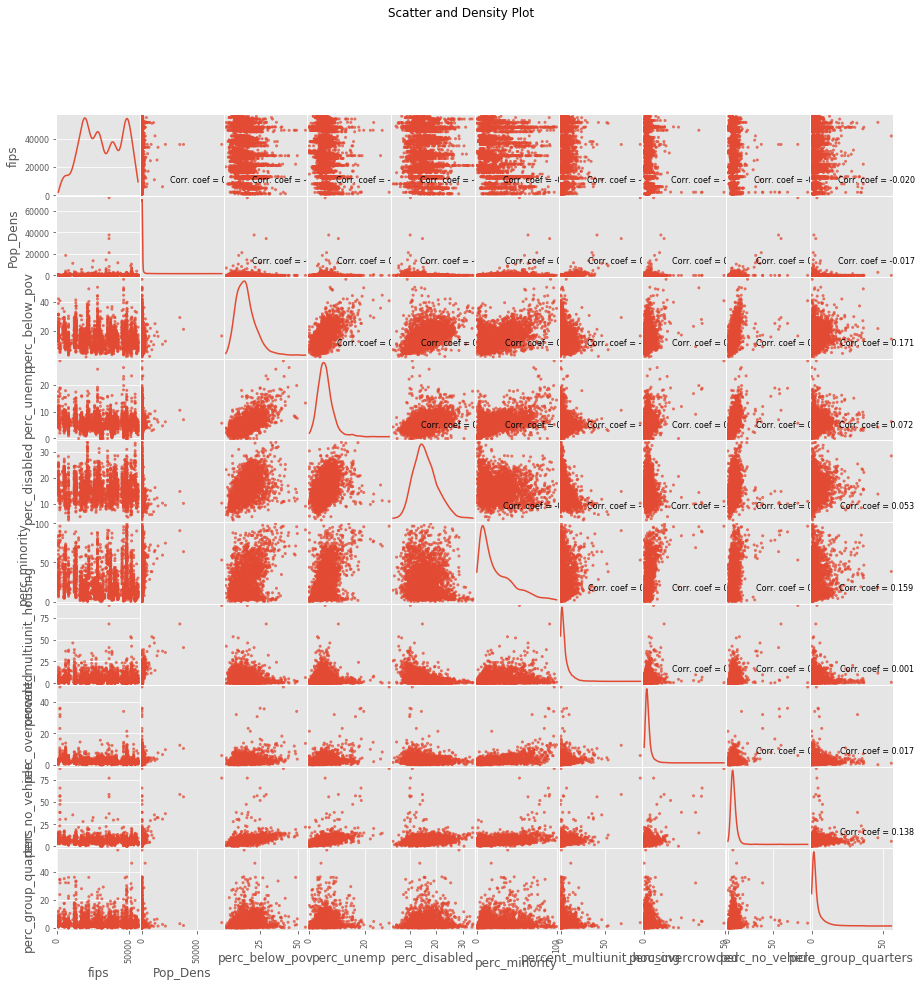

In [38]:
plotScatterMatrix(df1, 15, 8)